In [1]:
#Jupyter notebook
%matplotlib inline

#import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

## Raw Data Exploration 

In [2]:
#import the data
import pandas as pd

data = pd.read_csv('C:\\Users\\yzhang\\Desktop\\KTPAssociate\\Data\\NewData\\SELL_THROUGH_PRINTER.csv')
#data = data.to_pickle('C:\\Users\\yzhang\\Desktop\\KTPAssociate\\Data\\NewData\\SELL_THROUGH_PC.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872392 entries, 0 to 4872391
Data columns (total 28 columns):
record_id                         int64
date                              object
country                           object
product_category                  object
vendor_id_scramble                float64
product_id_scramble               float64
product_range_id_scramble         float64
product_family_id_scramble        float64
reseller_company_id_scramble      float64
p_reseller_company_id_scramble    float64
company_id_scramble               int64
company_id_original_scramble      int64
target_channel_id                 int64
final_customer_id                 int64
flag_company                      object
flag_reseller                     object
target_segment_48                 object
automatic_document_feeder_551     object
automatic_duplex_552              object
colour_775                        object
max_iso_page_size_548             object
network_capability_558   

In [4]:
#check values in each column
#print(data['country'].value_counts())
for col in data.columns:
    if len(data[col].value_counts()) < 50:
        print(data[col].value_counts())

Germany           2638387
Italy             2182183
United Kingdom    2128485
Spain             1375032
France            1253391
Poland             834924
Name: country, dtype: int64
Notebooks    7325033
Desktops     3087369
Name: product_category, dtype: int64
3     7810961
1     1173473
4      766512
2      453706
11      69652
8       49381
21      22545
5       17186
16      14763
25      11537
6       10312
9        8302
20       3338
18        582
13         95
26         57
Name: target_channel_id, dtype: int64
2     5197007
4     2020721
11    1612240
1     1314992
10     267442
Name: final_customer_id, dtype: int64
real    10370118
est        42284
Name: flag_company, dtype: int64
real    6987609
est     3424793
Name: flag_reseller, dtype: int64
Business              5260055
Consumer              4908555
Info Not Available       4711
Name: target_segment_48, dtype: int64
2                     5857848
4                     3791635
6                      371034
0               

In [5]:
#Check missing values
print('There are ' + str(len(data)) + ' transactions in the dataset')
for col in data.columns:
    if data[[col]].isnull().any().any():
        print("The number of NAN values in " + str(data[[col]].isna().sum()))
        print("The ratio of missing values is:" + str(data[[col]].isna().sum()/len(data[[col]])))

There are 10412402 transactions in the dataset
The number of NAN values in vendor_id_scramble    3400
dtype: int64
The ratio of missing values is:vendor_id_scramble    0.000327
dtype: float64
The number of NAN values in product_id_scramble    239081
dtype: int64
The ratio of missing values is:product_id_scramble    0.022961
dtype: float64
The number of NAN values in product_range_id_scramble    239081
dtype: int64
The ratio of missing values is:product_range_id_scramble    0.022961
dtype: float64
The number of NAN values in product_family_id_scramble    239081
dtype: int64
The ratio of missing values is:product_family_id_scramble    0.022961
dtype: float64
The number of NAN values in reseller_company_id_scramble    2869212
dtype: int64
The ratio of missing values is:reseller_company_id_scramble    0.275557
dtype: float64
The number of NAN values in p_reseller_company_id_scramble    3279392
dtype: int64
The ratio of missing values is:p_reseller_company_id_scramble    0.314951
dtype: flo

## Investigation on the products with missing ID and associated values 

Things that worth investigation: 
1. Aggregate products, Product ID: country, vendor_id, product_id. on daily or weekly level. 
2. Filtering feasible product. (percentage within all feasible products, percentage of the feasible product within the total revenue, percentage of the feasible product within the total sales units, and also the percentaegs considered in each country and vendor).
3. Analysis on the filtered data. (missing values of each columns, non-existent values by weekdays in each country, sale volume by weekdays in each country, )
3. After the filtering, aggregation on a daily or weekly basis.

In [4]:
import numpy as np
test1 = data[['vendor_id_scramble', 'product_id_scramble', 'revenue']]
test1 = test1.fillna(-1)
test2 = test1[test1['product_id_scramble']== -1]

In [7]:
summary_test1 = test1.groupby(['vendor_id_scramble', 'product_id_scramble'])['revenue'].sum()

In [8]:
summary_test2 = test2.groupby(['vendor_id_scramble', 'product_id_scramble'])['revenue'].sum()

In [9]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10412402 entries, 0 to 10412401
Data columns (total 3 columns):
vendor_id_scramble     float64
product_id_scramble    float64
revenue                float64
dtypes: float64(3)
memory usage: 238.3 MB


In [10]:
test1[test1['vendor_id_scramble'] ==  52621]

,vendor_id_scramble,product_id_scramble,revenue
766408,52621.0,9298271.0,335.870000
1061573,52621.0,9847240.0,-884.715548
1376478,52621.0,4985444.0,360.000000
2235538,52621.0,-1.0,96.419307
4378551,52621.0,-1.0,143.090000


In [11]:
f = {'revenue':['sum']}
summary1 = test1.groupby(['vendor_id_scramble']).agg(f)
summary2 = test2.groupby(['vendor_id_scramble']).agg(f)

In [12]:
summary = summary2.merge(summary1, left_on = 'vendor_id_scramble', right_on = 'vendor_id_scramble')
summary.columns = ['revenue_miss_product', 'total_revenue']
summary['miss_ratio'] = summary['revenue_miss_product']/summary['total_revenue']

In [13]:
summary = summary.loc[(summary['miss_ratio'] >= 0) & (summary['miss_ratio'] <= 1)]

In [14]:
summary = summary.sort_values(by = 'miss_ratio', ascending = False)

<IPython.core.display.Javascript object>


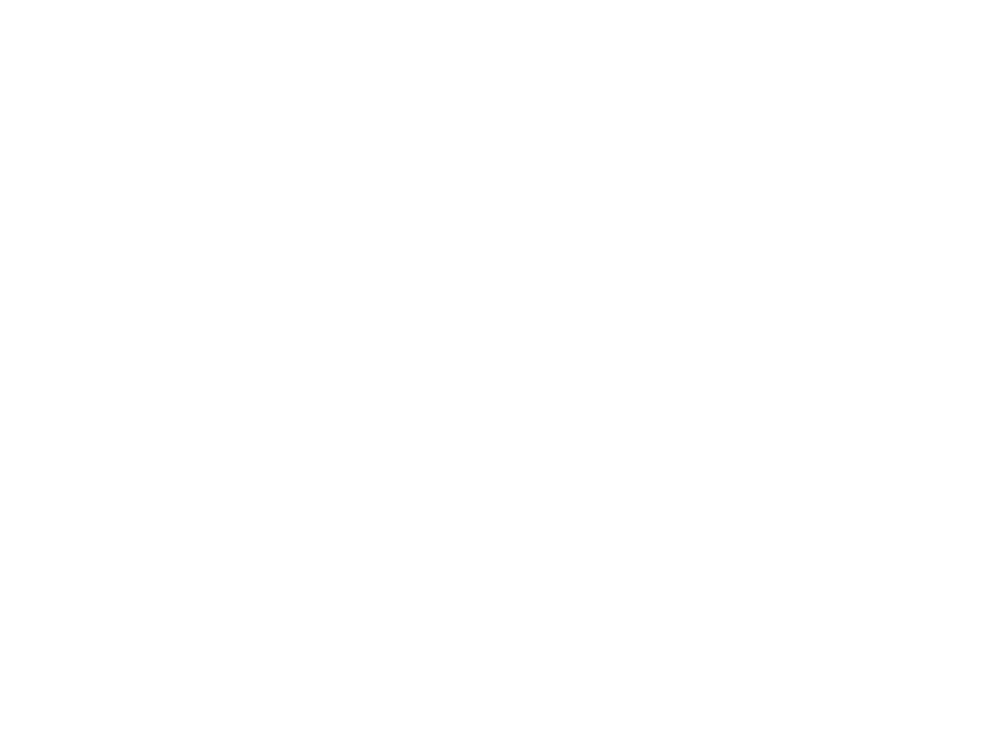

In [15]:
import seaborn as sns
sns.distplot(summary['miss_ratio'], kde = False)

In [16]:
test1[test1['product_id_scramble'] ==  -1].revenue.sum()/test1.revenue.sum()

0.01669188628780036

The products without product id and its associated values consititute 1.6% of the total revenue and 0.8% of the total 

## Exploratory Data Analysis

### Distributin of the products according to number of observations

In [5]:
from EDA import *
from functions import *

In [6]:
##############Global variables###########################
agg_def = ['country', 'vendor', 'product_range']
agg_level = 'D'
smooth_type_list = ['normal', 'outliers_interpolated_mean', 'outliers_interpolated_iqr']

In [7]:
##############Keep only the useful rows########################################
cols = ['date', 'country', 'vendor_id_scramble', 'product_range_id_scramble', 'product_id_scramble', 'units', 'revenue']
data = data[cols]
data = data.dropna(axis = 0)
data.columns = ['date', 'country', 'vendor','product_range', 'product', 'units', 'revenue']

Text(0, 0.5, 'Count Number of Products')

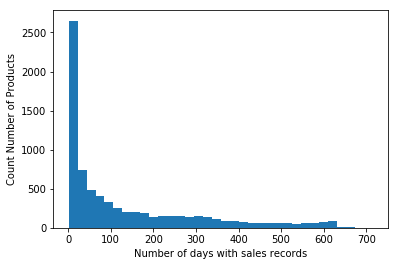

In [8]:
##############Distributin of the products according to noDays##################
##############Majority of the products have observations less than 100#########
df = aggregation(data, agg_def)
import matplotlib.pyplot as plt
plt.hist(df.noDays, bins = 'auto') 
plt.xlabel("Number of days with sales records")
plt.ylabel('Count Number of Products')
#plt.xlim(left =  100)
#plt.ylim(top = 2000)

### Select the feasible products 

In [12]:
##############Filter the feasible products#####################################
summary_data, data_grouped, total_number_product = filter_feasible_product(data
      = data, agg_level = agg_level, agg_def = agg_def)

In [13]:
summary_data.head()

startDate     endDate  noRecords  noDays  \
country vendor   product_range                                              
Italy   230489.0 269466.0       2016-10-01  2019-03-09       3978     664   
                 470264.0       2016-10-01  2019-03-09       9690     716   
        518034.0 783456.0       2016-10-01  2019-03-09      16506     678   
Spain   316264.0 445135.0       2016-10-01  2019-03-08       1941     550   
Germany 601707.0 39711.0        2016-10-01  2019-03-08      11591     620   

                                   units  period  
country vendor   product_range                    
Italy   230489.0 269466.0        33971.0     889  
                 470264.0       139914.0     889  
        518034.0 783456.0       125507.0     889  
Spain   316264.0 445135.0         2574.0     888  
Germany 601707.0 39711.0         39652.0     888

In [11]:
print('The number of feasible PC products range are ' + str(len(summary_data)) + ', constituting % of ' + str(total_number_product) + ' the PC range ')

The number of feasible PC products range are 562, constituting 9% of 7479 the PC range 


### Sales percentage of Feasible product within all products in considered vendor/ vendor+country 

In [14]:
# check whehte the selected products are Top sellers for considered vendor or vendor and country
summary_country_vendor = top_seller_by_country_vendor(data, summary_data).sort_values('ratio', ascending = False)
summary_vendor = top_seller_by_country_vendor(data, summary_data, ['vendor'])

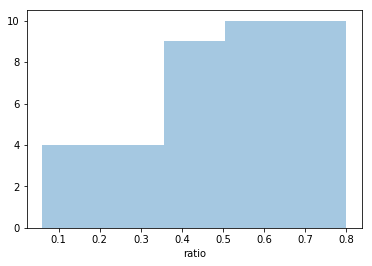

In [15]:
sns.distplot(summary_country_vendor['ratio'], kde = False)

In [26]:
bx = sns.distplot(summary_vendor['ratio'], kde = False)

### sales units on each weekday

In [16]:
################import the data################################################
import pandas as pd
data = pd.read_csv('C:\\Users\\yzhang\\Desktop\\KTPAssociate\\Data\\NewData\\SELL_THROUGH_PRINTER.csv')
data.columns

##############Keep only the useful rows########################################
cols = ['date', 'country', 'vendor_id_scramble', 'product_range_id_scramble', 'product_id_scramble', 'units', 'revenue']
data = data[cols]
data = data.dropna(axis = 0)
data.columns = ['date', 'country', 'vendor','product_range', 'product', 'units', 'revenue']

In [17]:
data.head()

,date,country,vendor,product_range,product,units,revenue
0,2017-03-27,Germany,601707.0,787153.0,1761408.0,1.0,230.780
1,2018-03-30,Italy,316264.0,159135.0,3537575.0,1.0,108.587
2,2017-01-31,Italy,316264.0,796124.0,7530802.0,1.0,94.820
3,2017-12-04,France,601707.0,298142.0,185631.0,1.0,76.410
4,2018-07-31,Spain,230489.0,63853.0,220807.0,2.0,336.840


In [18]:
summary_weekday = units_on_weekday_or_month(data, agg_type = 'weekday', agg_def = agg_def)

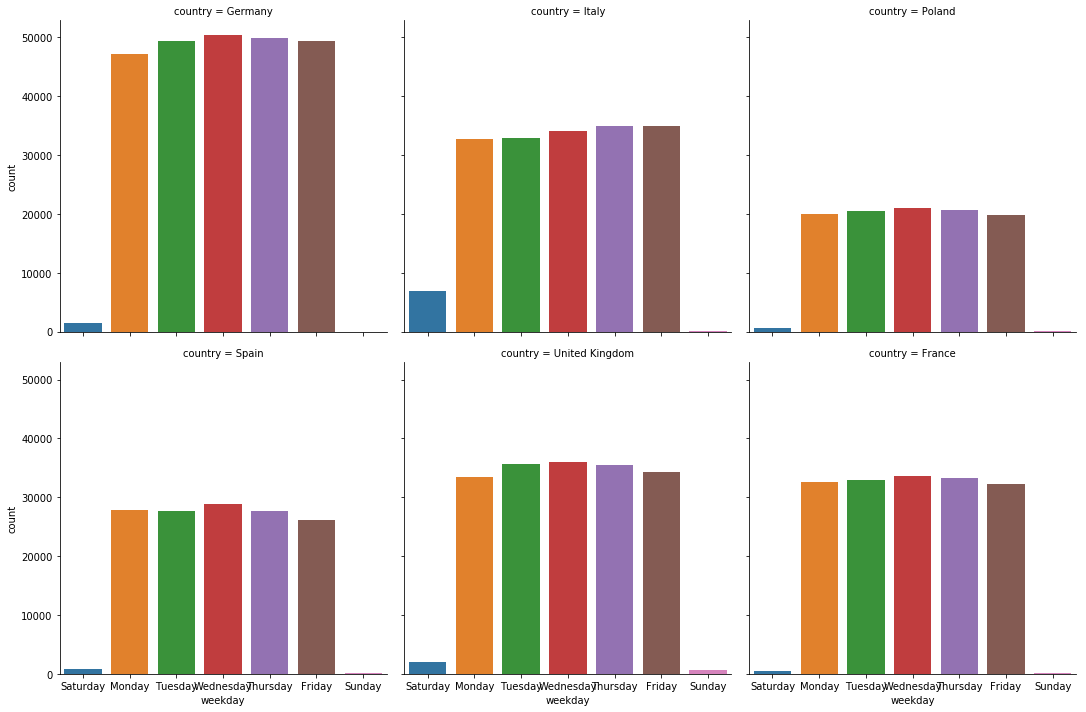

In [19]:
import numpy as np
g = sns.catplot(x="weekday", col="country", data =  summary_weekday, kind= "count", 
                legend = True, col_wrap = 3)

### sales units on each month

In [20]:
######sales units on each month
summary_month = units_on_weekday_or_month(data, agg_type  = 'month')

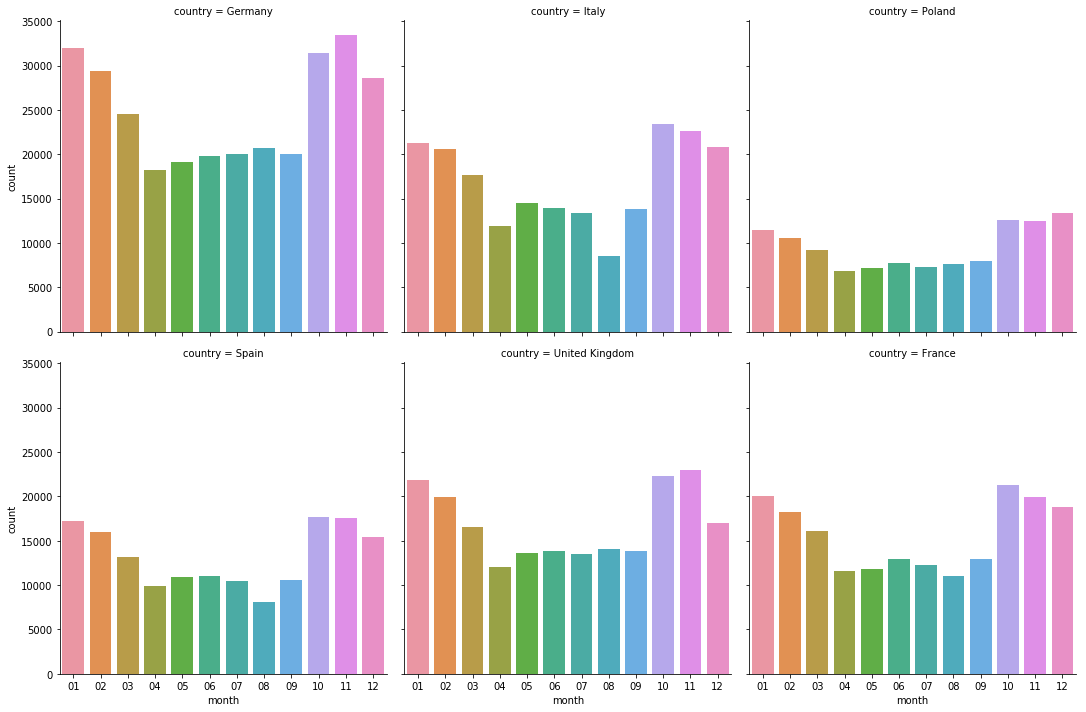

In [21]:
h = sns.catplot(x="month", col="country", data =  summary_month, kind= "count", 
                legend = True, col_wrap = 3)

### Count of Absent values on each Weekday

In [30]:
####for the feasible products##################################################
filter_data = pd.DataFrame()
for index in summary_data.index:
    index = tuple(index)
    data_example = data_grouped.get_group(index)
    filter_data = filter_data.append(data_example)

In [35]:
filter_data['date'] = pd.to_datetime(filter_data['date'])
filter_data['weekday'] = filter_data.date.dt.strftime("%A")
    

aggregation = agg_def
aggregation.append('weekday')
    
f = {'units':['sum']}
summary = filter_data.groupby(aggregation).agg(f)
summary.columns = ['units']
    
nonexistent_values = summary.unstack(level = -1)
number_0sales = nonexistent_values['units'].isna().sum()

In [37]:
nonexistent_values.head()

units                         \
weekday                                   Friday Monday Saturday Sunday   
date       country vendor   product_range                                 
2016-10-01 Germany 601707.0 303.0            NaN    NaN     20.0    NaN   
                            175654.0         NaN    NaN      9.0    NaN   
                            945857.0         NaN    NaN      6.0    NaN   
           Italy   601707.0 303939.0         NaN    NaN      1.0    NaN   
                   770806.0 728987.0         NaN    NaN     12.0    NaN   

                                                                      
weekday                                   Thursday Tuesday Wednesday  
date       country vendor   product_range                             
2016-10-01 Germany 601707.0 303.0              NaN     NaN       NaN  
                            175654.0           NaN     NaN       NaN  
                            945857.0           NaN     NaN       NaN  
           Italy   601707.0 303939.0           NaN     NaN       NaN  
                   770806.0 728987.0           NaN     NaN       NaN

In [36]:
#number_0sales =  nonexistent_values_weekday(filter_data)
print(number_0sales)

weekday
Friday       181086
Monday       182469
Saturday     219746
Sunday       224132
Thursday     180738
Tuesday      181703
Wednesday    180876
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)

In [ ]:
number_0sales.plot.bar()
plt.ylabel('Number of days with 0 sales')
plt.xlabel('Weekday')
plt.show()